# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

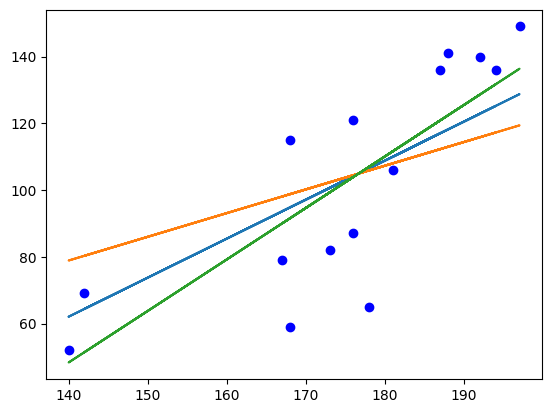

In [3]:
x_plot = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asarray(np.c_[np.ones((15,1)),x_plot])

I = np.identity(2)
alphas = [0.1, 1, 0.01]# change here

plt.scatter(x_plot.flatten(), y.flatten(), color='b')
for alpha in alphas:
    ridge_regression = Ridge(alpha=alpha, fit_intercept=False)
    ridge_regression.fit(X=x, y=y)
    plt.plot(x_plot.flatten(), ridge_regression.predict(x))

plt.show()

## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [4]:
def reg_predict(inputs: np.ndarray, w: np.ndarray):
    return inputs @ w

In [5]:
def sgd(x: np.ndarray, y: np.ndarray, learning_rate: float):
    batch_size = 3
    iterations = 5
    epsilon = 0.01
    # learning_rate = 0.000001
    weights = np.ones(shape=(x.shape[1], 1))
    previous_results = []
    for _ in range(iterations):
        y_pred = reg_predict(x, weights)
        diff = np.dot(x.T, y_pred - y)
        weights = weights - (learning_rate * diff)
    return weights
            

In [6]:
x_plot = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asarray(np.c_[np.ones((15,1)),x_plot])

I = np.identity(2)
alpha = 0.1

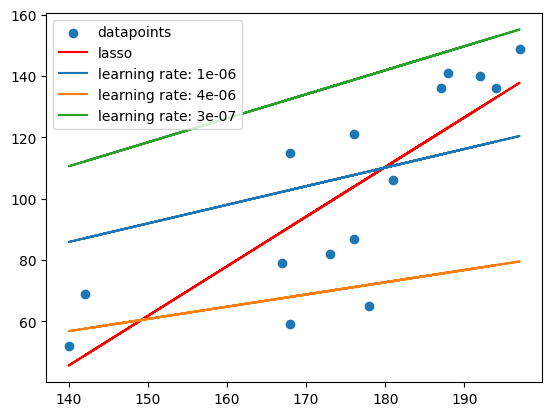

In [7]:
test_model = Lasso(alpha=0.1)
test_model.fit(x, y)
learning_rates = [0.000001, 0.000004, 0.0000003]
labels = ['datapoints', 'lasso']
plt.scatter(x_plot, y)
plt.plot(x_plot, test_model.predict(x), color='r')
for lr in learning_rates:
    plt.plot(x_plot, reg_predict(x, sgd(x, y, lr)))
    labels.append(f'learning rate: {lr}')
plt.legend(labels)
plt.show()

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

(150, 2), (1, 150)


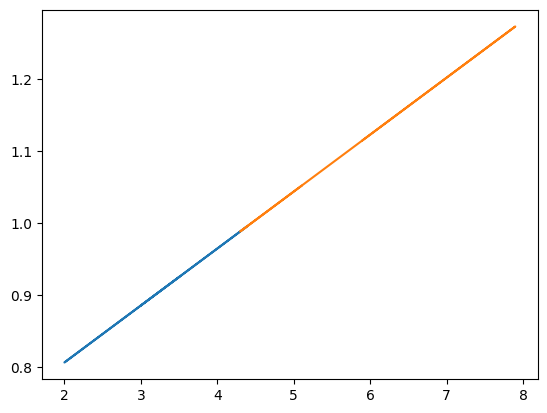

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df[['sepal width (cm)', 'sepal length (cm)']].values.reshape(-1, 2)# change here
y = iris_data.target.reshape(1, -1) # change here

dataset_size = np.size(x)
print(f'{np.shape(x)}, {np.shape(y)}')
mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y @ x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x

y_pred = a * x + b
plt.plot(x, y_pred)
plt.show()